<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/tp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

======================================= Introdução ========================================================
inicio do dataframe:
         x1        x2  label
0  0.422494  0.206446      1
1 -0.382710  0.158482      1
2 -0.568391  0.306051      1
3 -0.389914  0.349151      1
4  0.454089 -0.890466      0
mostra o final do dataset=            x1        x2  label
995  0.261683  0.879943      0
996 -1.002156 -0.327634      0
997 -0.050342 -0.571750      1
998  0.637262 -0.857412      0
999  0.271811  0.976197      0
mostra descritivas do dataset=
                x1           x2       label
count  1000.000000  1000.000000  1000.00000
mean     -0.001493    -0.002680     0.50000
std       0.562217     0.567284     0.50025
min      -1.257779    -1.230499     0.00000
25%      -0.439948    -0.449368     0.00000
50%       0.017176    -0.008701     0.50000
75%       0.438260     0.424125     1.00000
max       1.118057     1.157938     1.00000
informações sobre o DataFrame=
<class 'pandas.core.frame.

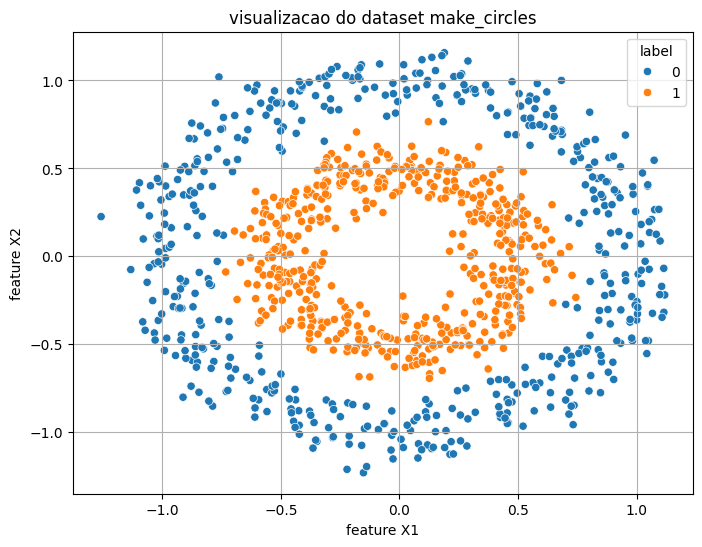

O grafico mostra 2 círculos.
Os dados são não-lineares, para que seja possivel usar o algoritmo como o DBSCAN.

pre-processamento: escalonamento dos dados
dados escalonados. media proxima de [0] e desvio padrao [1]
k-distancias para escolher eps


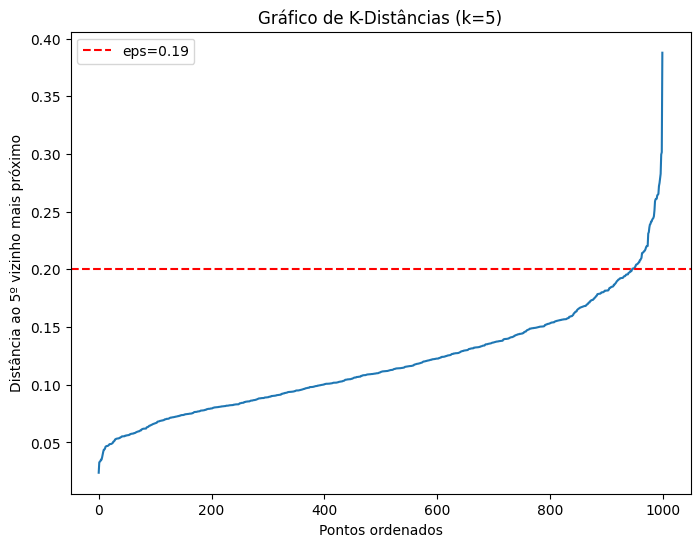

1) Aplique o DBSCAN para encontrar agrupamentos no dataset sintético make_circles.
rotulos dos clusters encontrados= [-1  0  1  2  3  4  5]

 analise 

numero de clusters encontrados: 6
numero de pontos classificados como ruido: 42


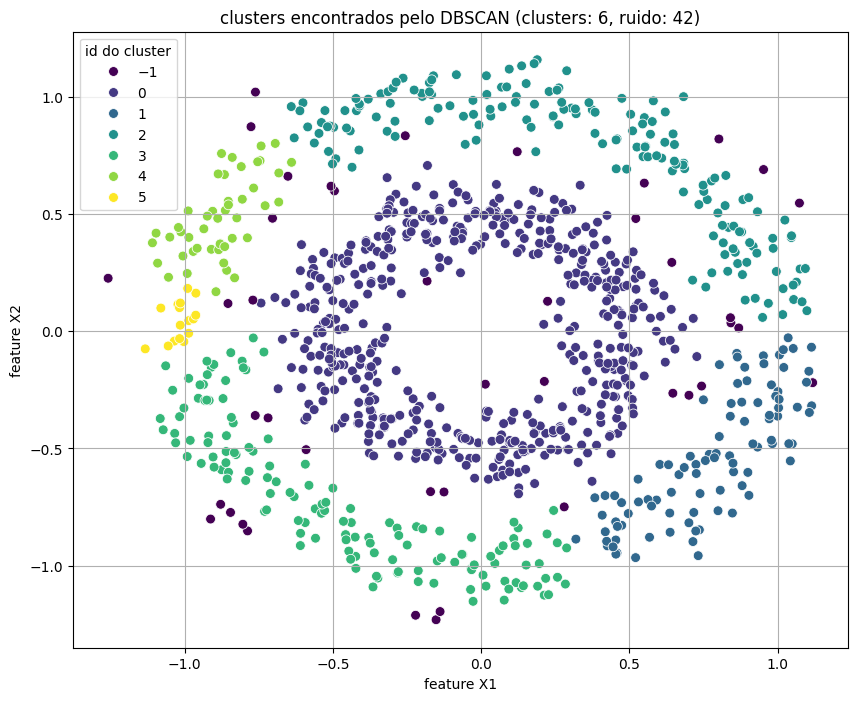

===================================== Avaliação Quantitativa ==============================================
2) Aplicando as métricas usuais, avalie os resultados obtidos por você na questão anterior.
coeficiente de Silhueta [Métrica Intrínseca]
coeficiente de silhueta: 0.091
avaliação extrinseca [compara com os rotulos verdadeiros]
adjusted rand index [ARI]: 0.644
homogeneidade: 0.971
completude: 0.489
v-measure: 0.651
========================================= Testes Variacao =================================================
3) Execute testes de variações nos parâmetros eps e min_samples na sua implementação do DBSCAN na questão 1.
testando: eps=0.15, min_samples=5
testando: eps=0.15, min_samples=7
testando: eps=0.15, min_samples=9
testando: eps=0.2, min_samples=5
testando: eps=0.2, min_samples=7
testando: eps=0.2, min_samples=9
testando: eps=0.22, min_samples=5
testando: eps=0.22, min_samples=7
testando: eps=0.22, min_samples=9
eps       min_samples    Clusters  Ruído     Silhueta    

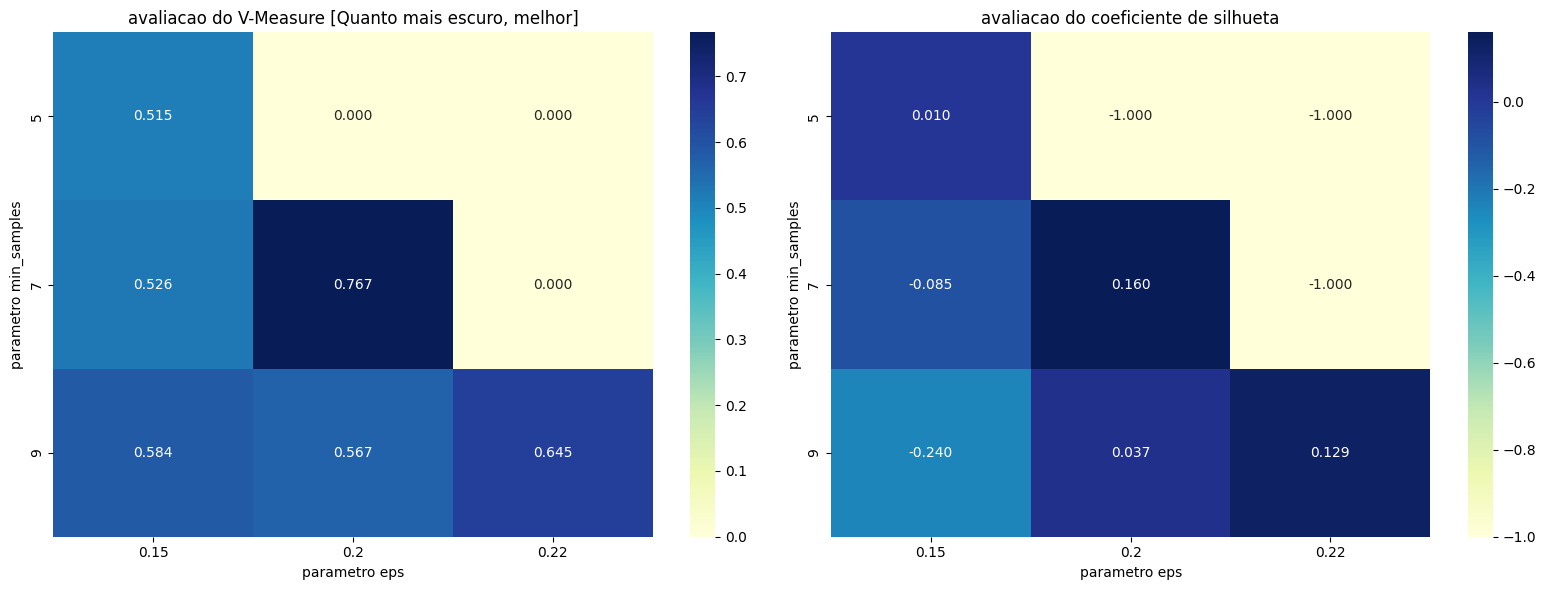

Analise dos Heatmaps
V-measure [heatmap a esquerda]:o quadrado mais escuro e está na linha min_samples=7 e na coluna eps=0.20,
com o valor 0.767. Isso confirma que esta combinação de parâmetros resultou no melhor desempenho para o modelo. A intensidade da cor escura torna fácil identificar o resultado mais otimizado.


Coeficiente de silhueta [heatmap a direita]: mesmo o valor de 0.160 para a mesma combinacao [eps=0.20, min_samples=7] seja o mais alto da tabela, a cor correspondente no heatmap e menor.
isso reforça a nossa analise de que o coeficiente de silhueta pode ser enganador para o DBSCAN, especialmente quando os clusters nao sao perfeitamente convexos, mesmo que a separação real dos dados seja boa.
5) Aplique o DBSCAN para determinar agrupamentos no dataset Forest covertypes.


In [3]:
# ===============================================================================================================
#importacoes
# ===============================================================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score

print("===========================================================================================================")
print("======================================= Introdução ========================================================")
print("===========================================================================================================")


#geracao do dataset
#n_samples= nº total de pontos
#noise= desvio padrao do ruido gaussiano adicionado
#factor= fator de escala entre o circulo interno e o externo [0 < factor < 1]
#random_state= semente para reprodutibilidade guia do mochileiro das galaxias
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

#conversao para dataframe do pandas para utilizacao
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))

#mostrando o começo do dataframe
print("inicio do dataframe:")
print(df.head())

#final do dataframe
print("mostra o final do dataset=", df.tail())


#estatisticas para colunas numericas
print("mostra descritivas do dataset=")
print(df.describe())

#dados sobre as colunas e tipos de dados:
print("informações sobre o DataFrame=")
df.info()

#nomes das colunas
print("mostra nome das colunas=", df.columns)


print("===========================================================================================================")
print("======================================= Visualização ========================================================")
print("===========================================================================================================")



print("analise grafica do dataset")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x1', y='x2', data=df, hue='label')
plt.title('visualizacao do dataset make_circles')
plt.xlabel('feature X1')
plt.ylabel('feature X2')
plt.grid(True)
plt.show()

print("O grafico mostra 2 círculos.")
print("Os dados são não-lineares, para que seja possivel usar o algoritmo como o DBSCAN.\n")

print("===========================================================================================================")

print("pre-processamento: escalonamento dos dados")
# DBSCAN e sensivel a escala, pois usa distancias [parâmetro 'eps'].
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("dados escalonados. media proxima de [0] e desvio padrao [1]")

#analise do grafico de k-distancias para escolher eps
print("k-distancias para escolher eps")
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, _ = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('Gráfico de K-Distâncias (k=5)')
plt.xlabel('Pontos ordenados')
plt.ylabel('Distância ao 5º vizinho mais próximo')
plt.axhline(y=0.2, color='r', linestyle='--', label='eps=0.19')
plt.legend()
plt.show()
print("===========================================================================================================")

print("1) Aplique o DBSCAN para encontrar agrupamentos no dataset sintético make_circles.")

dbscan_model = DBSCAN(eps=0.19, min_samples=7)

#aplicar o modelo aos dados escalonados
clusters = dbscan_model.fit_predict(X_scaled)
print(f"rotulos dos clusters encontrados= {np.unique(clusters)}") # O valor -1 indica ruído/outlier


print("\n analise \n")

#adicionar os resultados do cluster ao dataframe para facilitar a analise
df['cluster_dbscan'] = clusters

#contar o numero de clusters e pontos de ruido
n_clusters = len(pd.unique(df['cluster_dbscan'])) - (1 if -1 in df['cluster_dbscan'].unique() else 0)
n_noise = np.sum(df['cluster_dbscan'] == -1)

print(f"numero de clusters encontrados: {n_clusters}")
print(f"numero de pontos classificados como ruido: {n_noise}")

#visualizar os clusters encontrados pelo DBSCAN
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x1', y='x2', data=df, hue='cluster_dbscan', palette='viridis', s=50)
plt.title(f'clusters encontrados pelo DBSCAN (clusters: {n_clusters}, ruido: {n_noise})')
plt.xlabel('feature X1')
plt.ylabel('feature X2')
plt.legend(title='id do cluster')
plt.grid(True)
plt.show()

print("===========================================================================================================")
print("===================================== Avaliação Quantitativa ==============================================")
print("===========================================================================================================")

print("2) Aplicando as métricas usuais, avalie os resultados obtidos por você na questão anterior.")
print("coeficiente de Silhueta [Métrica Intrínseca]")
n_clusters = len(pd.unique(df['cluster_dbscan'])) - (1 if -1 in df['cluster_dbscan'].unique() else 0)
if n_clusters > 1:
    score_silhueta = silhouette_score(X_scaled, clusters)
    print(f"coeficiente de silhueta: {score_silhueta:.3f}")
else:
    print("coeficiente de silhueta: nao pode ser calculado [encontrado apenas 1 cluster]")

print("===========================================================================================================")

print("avaliação extrinseca [compara com os rotulos verdadeiros]")
#filtramos os pontos de ruido [rótulo -1] antes de calcular as metricas
non_noise_mask = clusters != -1
true_labels_filtered = y[non_noise_mask]
predicted_clusters_filtered = clusters[non_noise_mask]

#adjusted rand index [ARI])
score_ari = adjusted_rand_score(true_labels_filtered, predicted_clusters_filtered)
print(f"adjusted rand index [ARI]: {score_ari:.3f}")

#homogeneidade, completude e v-measure
score_homogeneidade = homogeneity_score(true_labels_filtered, predicted_clusters_filtered)
score_completude = completeness_score(true_labels_filtered, predicted_clusters_filtered)
score_v = v_measure_score(true_labels_filtered, predicted_clusters_filtered)

print(f"homogeneidade: {score_homogeneidade:.3f}")
print(f"completude: {score_completude:.3f}")
print(f"v-measure: {score_v:.3f}")

print("===========================================================================================================")
print("========================================= Testes Variacao =================================================")
print("===========================================================================================================")
print("3) Execute testes de variações nos parâmetros eps e min_samples na sua implementação do DBSCAN na questão 1.")

#definir as variacoes
eps_values = [0.15, 0.20, 0.22]
min_samples_values = [5, 7, 9]

#lista p/ armazenar
results = []

#iterar sobre as combinacoes
for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"testando: eps={eps}, min_samples={min_samples}")

        #aplicar DBSCAN
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_test = dbscan_model.fit_predict(X_scaled)

        #contar o numero de clusters e ruido
        n_clusters_test = len(np.unique(clusters_test)) - (1 if -1 in clusters_test else 0)
        n_noise_test = np.sum(clusters_test == -1)

        #calcular metricas de avaliacao
        silhouette = -1
        if n_clusters_test > 1:
            silhouette = silhouette_score(X_scaled, clusters_test)

        #filtrar pontos de ruido para metricas extrinsecas
        non_noise_mask_test = clusters_test != -1
        if np.sum(non_noise_mask_test) > 0:
            v_measure = v_measure_score(y[non_noise_mask_test], clusters_test[non_noise_mask_test])
        else:
            v_measure = 0

        #armazenar os resultados
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters_test,
            'n_noise': n_noise_test,
            'silhouette': silhouette,
            'v_measure': v_measure
        })

#exibir os resultados em formato de tabela

print(f"{'eps':<10}{'min_samples':<15}{'Clusters':<10}{'Ruído':<10}{'Silhueta':<15}{'V-Measure':<15}")

for res in results:
    print(f"{res['eps']:<10.2f}{res['min_samples']:<15}{res['n_clusters']:<10}{res['n_noise']:<10}{res['silhouette']:<15.3f}{res['v_measure']:<15.3f}")

print("analise dos testes:")
print("A tabela mostra como cada combinacao de parametros afetou o numero de clusters,")
print("o ruido e as metricas de avaliacao [Silhueta e V-Measure].")

print("===========================================================================================================")
print("========================================= Testes Variacao =================================================")
print("===========================================================================================================")

print("4) Avalie os seus testes executados na questão 3, comparando os efeitos das variações nos parâmetros nos resultados obtidos pelo DBSCAN. Você pode usar um heatmap para essa demonstração.")


#dados dos resultados
results = [
    {'eps': 0.15, 'min_samples': 5, 'n_clusters': 16, 'n_noise': 69, 'silhouette': 0.010, 'v_measure': 0.515},
    {'eps': 0.15, 'min_samples': 7, 'n_clusters': 20, 'n_noise': 174, 'silhouette': -0.085, 'v_measure': 0.526},
    {'eps': 0.15, 'min_samples': 9, 'n_clusters': 17, 'n_noise': 330, 'silhouette': -0.240, 'v_measure': 0.584},
    {'eps': 0.20, 'min_samples': 5, 'n_clusters': 1, 'n_noise': 13, 'silhouette': -1.000, 'v_measure': 0.000},
    {'eps': 0.20, 'min_samples': 7, 'n_clusters': 3, 'n_noise': 24, 'silhouette': 0.160, 'v_measure': 0.767},
    {'eps': 0.20, 'min_samples': 9, 'n_clusters': 10, 'n_noise': 65, 'silhouette': 0.037, 'v_measure': 0.567},
    {'eps': 0.22, 'min_samples': 5, 'n_clusters': 1, 'n_noise': 5, 'silhouette': -1.000, 'v_measure': 0.000},
    {'eps': 0.22, 'min_samples': 7, 'n_clusters': 1, 'n_noise': 10, 'silhouette': -1.000, 'v_measure': 0.000},
    {'eps': 0.22, 'min_samples': 9, 'n_clusters': 5, 'n_noise': 18, 'silhouette': 0.129, 'v_measure': 0.645}
]

#converter a lista de dicionarios para um dataframe do pandas
df_results = pd.DataFrame(results)

#criar uma matriz para o heatmap do V-Measure
#o V-measure e ideal para esta avaliacao, pq compara o resultado do clustering com os rotulos verdadeiros
v_measure_matrix = df_results.pivot(index='min_samples', columns='eps', values='v_measure')

#criar uma matriz para o heatmap do coeficiente de silhueta
#este coeficiente avalia a coesao dos clusters.
silhouette_matrix = df_results.pivot(index='min_samples', columns='eps', values='silhouette')

#criar a figura com dois subplots [um p/ cada heatmap]
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#heatmap para o V-Measure
sns.heatmap(v_measure_matrix, annot=True, fmt=".3f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title('avaliacao do V-Measure [Quanto mais escuro, melhor]')
axes[0].set_xlabel('parametro eps')
axes[0].set_ylabel('parametro min_samples')

#heatmap para o coeficiente de silhueta
sns.heatmap(silhouette_matrix, annot=True, fmt=".3f", cmap="YlGnBu", ax=axes[1])
axes[1].set_title('avaliacao do coeficiente de silhueta')
axes[1].set_xlabel('parametro eps')
axes[1].set_ylabel('parametro min_samples')

#ajustar o layout para evitar sobreposicao
plt.tight_layout()
plt.show()

print("Analise dos Heatmaps")

print("V-measure [heatmap a esquerda]:o quadrado mais escuro e está na linha min_samples=7 e na coluna eps=0.20,")
print("com o valor 0.767. Isso confirma que esta combinação de parâmetros resultou no melhor desempenho para o modelo. A intensidade da cor escura torna fácil identificar o resultado mais otimizado.")
print("\n")
print("Coeficiente de silhueta [heatmap a direita]: mesmo o valor de 0.160 para a mesma combinacao [eps=0.20, min_samples=7] seja o mais alto da tabela, a cor correspondente no heatmap e menor.")
print("isso reforça a nossa analise de que o coeficiente de silhueta pode ser enganador para o DBSCAN, especialmente quando os clusters nao sao perfeitamente convexos, mesmo que a separação real dos dados seja boa.")


print("5) Aplique o DBSCAN para determinar agrupamentos no dataset Forest covertypes.")



/tmp/ipython-input-1288307754.py:25: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'forest-cover-type-dataset' dataset.
======================================= Introdução ========================================================
inicio do dataframe=
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                 

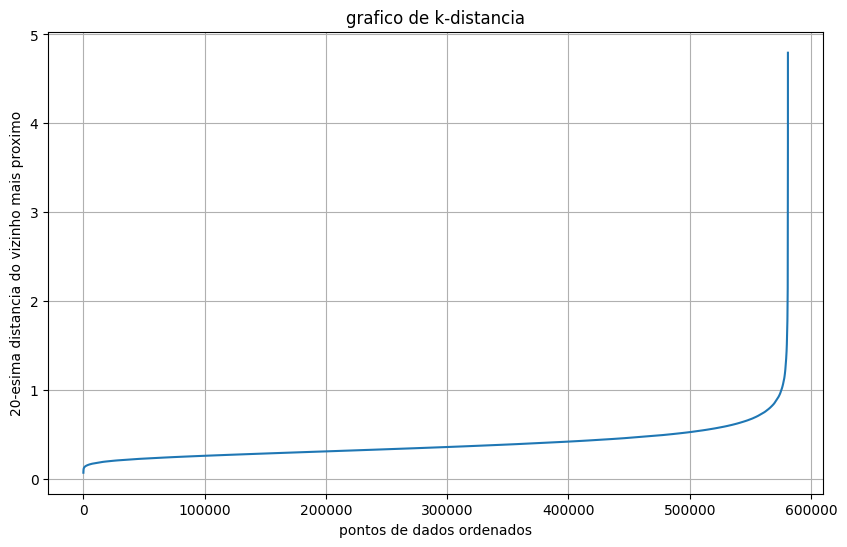

resultados do DBSCAN
numero de clusters encontrados: 76
numero de pontos de ruido: 1321 (0.23%)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


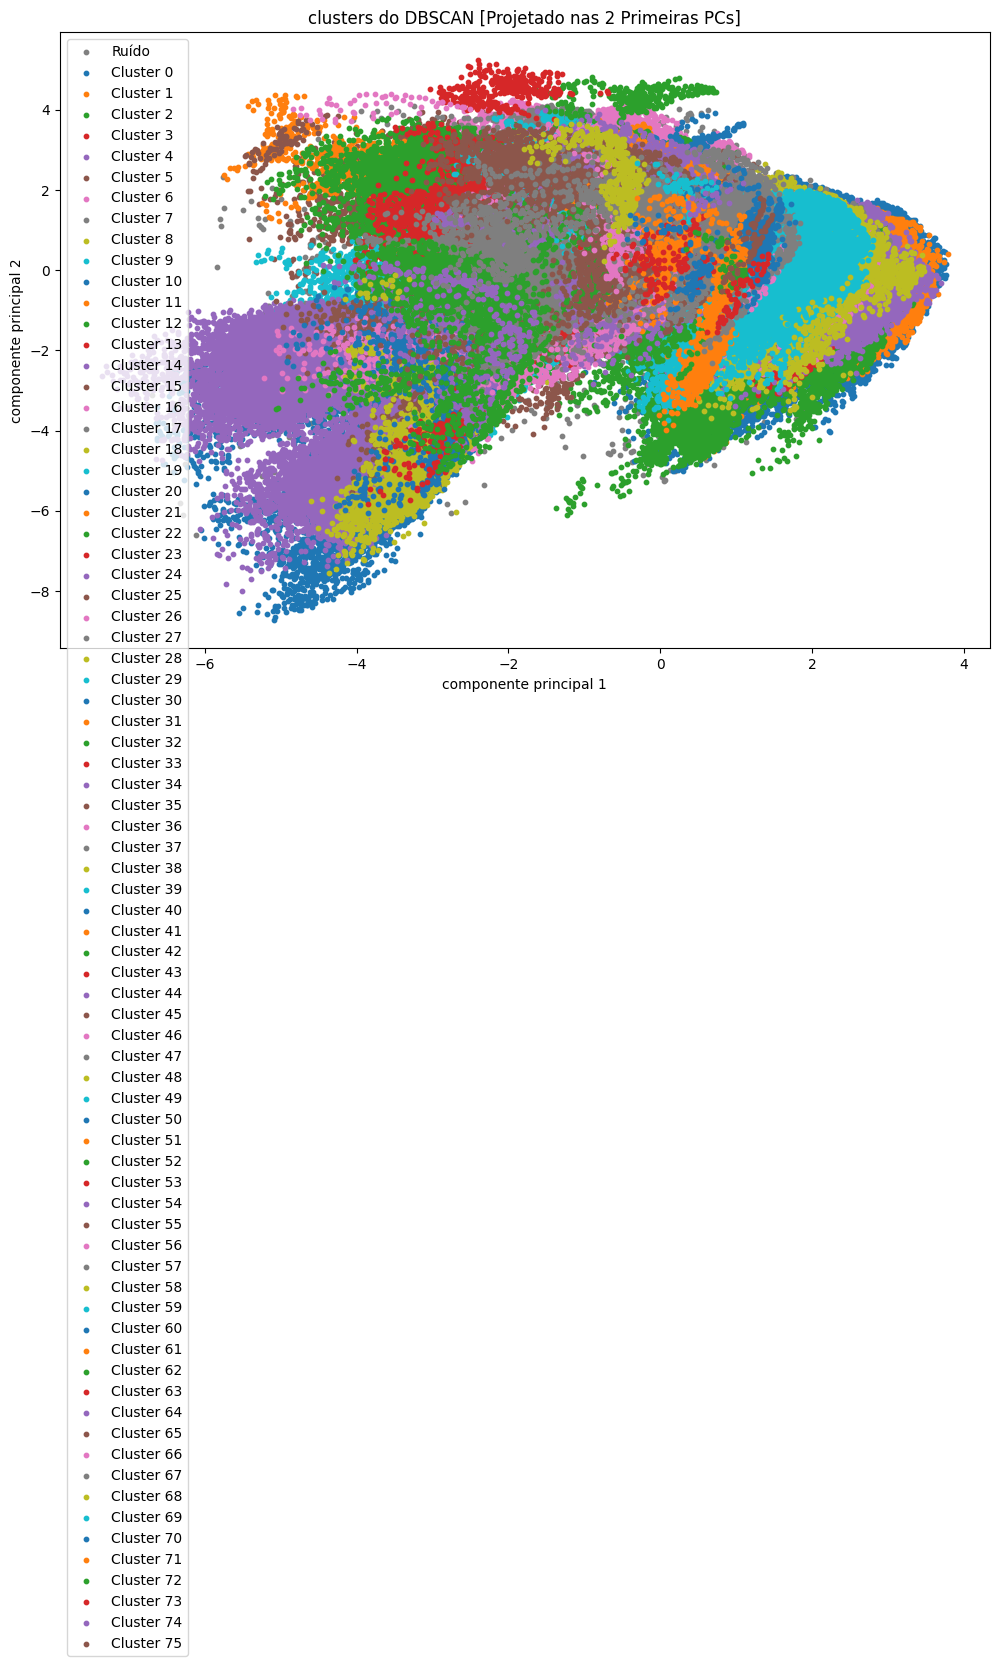

6) Analise os resultados obtidos na questão 5. Existe, aparentemente, alguma espécie dominante? Explique.
Analisando os resultados, a dominante nao pode ser encontrada apenas com o DBSCAN.
O DBSCAN é um algoritmo de agrupamento que encontra regioes densas de dados e marca pontos isolados como ruido, sem usar a variavel Cover_Type.
Ele agrupa os dados com base em suas caracteristicas [Elevation, Slope ....], nao em seus rotulos de classe.
[Agrupamento x. Classificação]: A aplicacao do DBSCAN apresentou em 76 clusters e apenas 1.321 pontos de ruido [0,23%].
Isso mostra que o algoritmo foi bem-sucedido em encontrar estruturas de alta densidade no conjunto de dados.
Mais esses clusters representam regioes com caracteristicas topograficas e ambientais semelhantes, e nao necessariamente correspondem a uma unica especie de arvore.
Aparencia de Dominancia: Para saber se uma especie e dominante, vamos analisar a distribuicao da variavel Cover_Type.

Analise Dominancia
distribuicao da variavel '

In [4]:
#instalar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.datasets import fetch_covtype
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score


!pip install kagglehub[pandas-datasets]

# Set the path to the file you'd like to load
file_path = "covtype.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/forest-cover-type-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


print("===========================================================================================================")
print("======================================= Introdução ========================================================")
print("===========================================================================================================")


#mostrando o começo do dataframe
print("inicio do dataframe=")
print(df.head())

#final do dataframe
print("mostra o final do dataset=", df.tail())


#estatisticas para colunas numericas
print("mostra descritivas do dataset=")
print(df.describe())

#dados sobre as colunas e tipos de dados:
print("informações sobre o DataFrame=")
df.info()

#nomes das colunas
print("mostra nome das colunas=", df.columns)


print("===========================================================================================================")
print("========================================= DBSCAN Covertypes ===============================================")
print("===========================================================================================================")

print("5) Aplique o DBSCAN para determinar agrupamentos no dataset Forest covertypes.")





#carregar o dataset diretamente do scikit-learn
X, y = fetch_covtype(return_X_y=True)

#padronizacao dos dados para uma escala comum
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#reducao de dimensionalidade com PCA [10]
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"dados originais: {X.shape}")
print(f"dados apos PCA: {X_pca.shape}")

#determinacao dos parametros
#minpts = 2 * n_features [2 * 10 = 20]
min_pts = 20

#grafico de K-distancia para encontrar o valor de epsilon
#calcula a distancia do 20º vizinho mais proximo para cada ponto
neighbors = NearestNeighbors(n_neighbors=min_pts)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
distances = np.sort(distances[:, min_pts-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('grafico de k-distancia')
plt.xlabel('pontos de dados ordenados')
plt.ylabel(f'{min_pts}-esima distancia do vizinho mais proximo')
plt.grid(True)
plt.show()

# Baseado no grafico, escolher um epsilon no ponto do cotovelo.
#o valor exato pode variar dependendo da visualizacao.
epsilon = 1.0

#aplicacao do DBSCAN com os parametros otimizados
dbscan = DBSCAN(eps=epsilon, min_samples=min_pts, n_jobs=-1)
clusters = dbscan.fit_predict(X_pca)

#analise dos resultados
unique_clusters, counts = np.unique(clusters, return_counts=True)
cluster_info = dict(zip(unique_clusters, counts))

n_clusters_found = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
n_noise_points = cluster_info.get(-1, 0)
total_points = len(X)

print("resultados do DBSCAN")
print(f"numero de clusters encontrados: {n_clusters_found}")
print(f"numero de pontos de ruido: {n_noise_points} ({n_noise_points/total_points:.2%})")

#visualizacao de alguns clusters [se a dimensionalidade for 2 ou 3]
plt.figure(figsize=(12, 8))
#separar os pontos de ruido
noise_points = X_pca[clusters == -1]
plt.scatter(noise_points[:, 0], noise_points[:, 1], c='gray', s=10, label='Ruído')

#plotar os clusters
for i in range(n_clusters_found):
    cluster_points = X_pca[clusters == i]
    if len(cluster_points) > 0:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, label=f'Cluster {i}')

plt.title('clusters do DBSCAN [Projetado nas 2 Primeiras PCs]')
plt.xlabel('componente principal 1')
plt.ylabel('componente principal 2')
plt.legend()
plt.show()


print("6) Analise os resultados obtidos na questão 5. Existe, aparentemente, alguma espécie dominante? Explique.")


print("Analisando os resultados, a dominante nao pode ser encontrada apenas com o DBSCAN.")
print("O DBSCAN é um algoritmo de agrupamento que encontra regioes densas de dados e marca pontos isolados como ruido, sem usar a variavel Cover_Type.")
print("Ele agrupa os dados com base em suas caracteristicas [Elevation, Slope ....], nao em seus rotulos de classe.")


print("[Agrupamento x. Classificação]: A aplicacao do DBSCAN apresentou em 76 clusters e apenas 1.321 pontos de ruido [0,23%].")
print("Isso mostra que o algoritmo foi bem-sucedido em encontrar estruturas de alta densidade no conjunto de dados.")
print("Mais esses clusters representam regioes com caracteristicas topograficas e ambientais semelhantes, e nao necessariamente correspondem a uma unica especie de arvore.")

print("Aparencia de Dominancia: Para saber se uma especie e dominante, vamos analisar a distribuicao da variavel Cover_Type.")


# Supondo que o DataFrame original seja 'df'
# Contar a frequência de cada tipo de cobertura
cover_type_counts = df['Cover_Type'].value_counts()

# Encontrar o tipo de cobertura com maior frequência
dominant_species = cover_type_counts.idxmax()
dominant_count = cover_type_counts.max()
total_records = len(df)

# Calcular a porcentagem
percentage = (dominant_count / total_records) * 100

print("===========================================================================================================\n")

print("Analise Dominancia")
print("distribuicao da variavel 'Cover_Type':")
print(cover_type_counts)
print(f"A dominante [com maior frequencia] e a de numero: {dominant_species}")
print(f"ela representa {percentage:.2f}% de todas as observacoes.")

7) Aplique os algoritmos k-means e Agglometarive Clustering sobre o dataset sintético make_circles.
================================ geracao, pre-processamento e visualizacao ================================


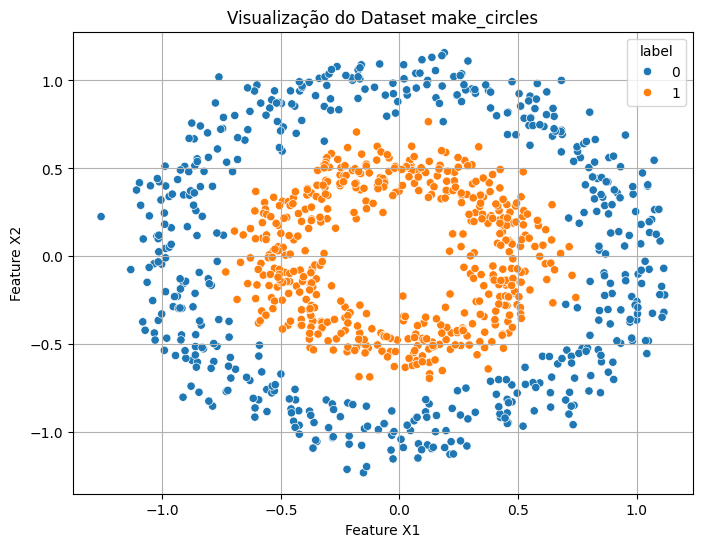

dados escalonados. Media proxima de 0 e desvio padrao de 1.

===================================== aplicacao do DBSCAN =================================================


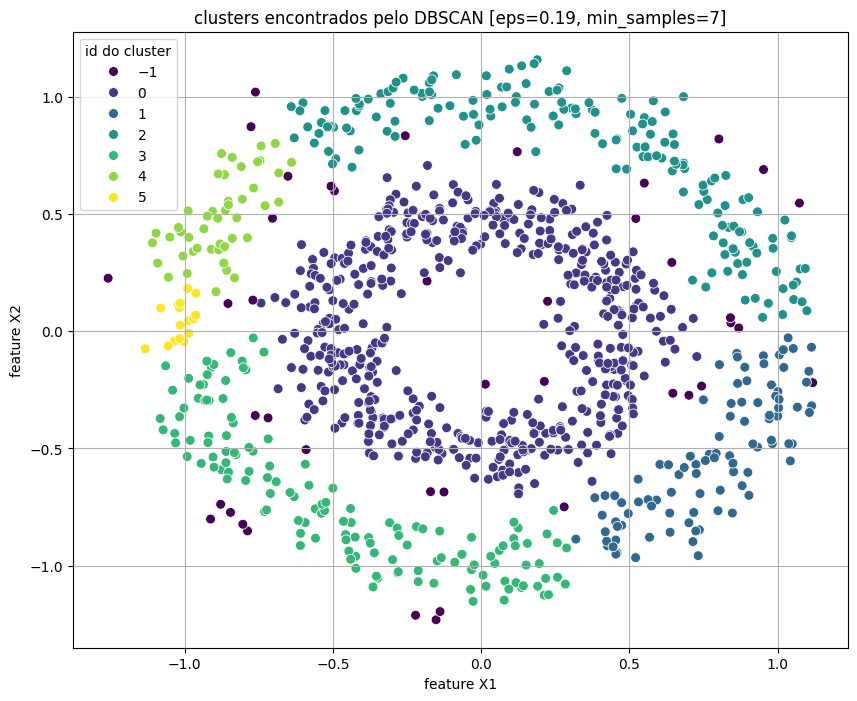

metricas do DBSCAN: v-measure=0.651, ARI=0.644, NMI=0.651
Silhouette Score: 0.119
===================================== aplicação do K-Means ================================================
o k-means e um algoritmo baseado em centroides e assume que os clusters tem uma forma esferica.
Ele terá   dificuldade com o formato circular do dataset.


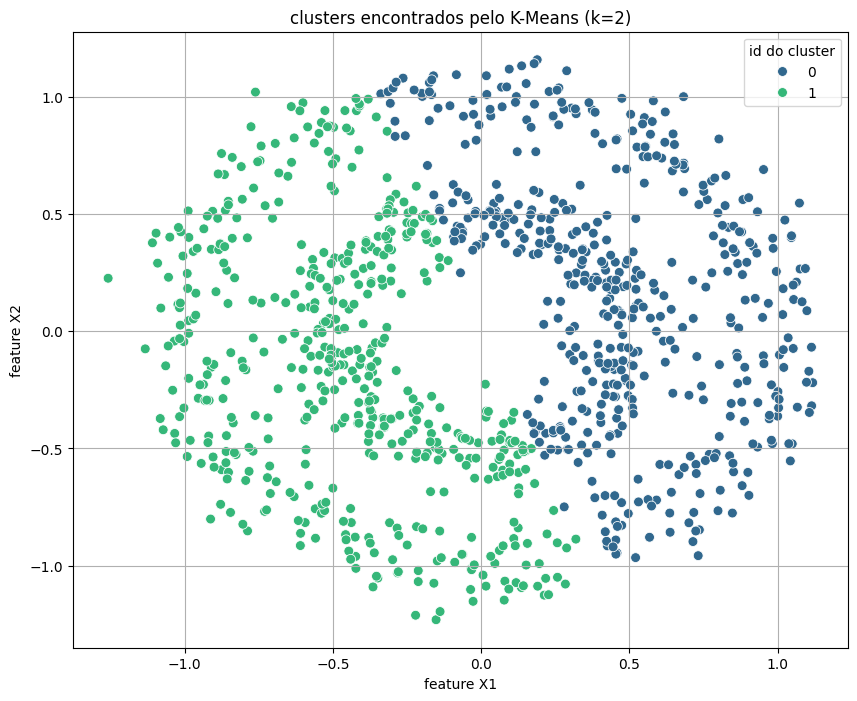

Métricas do K-Means: V-Measure=0.000, ARI=-0.001, NMI=0.000
Silhouette Score: 0.347
======================= aplicacao do agglomerative clustering =============================================
O agglomerative clustering e um algoritmo hierarquico. Nao e o ideal pois tenta criar agrupamentos a partir da proximidade de pontos.


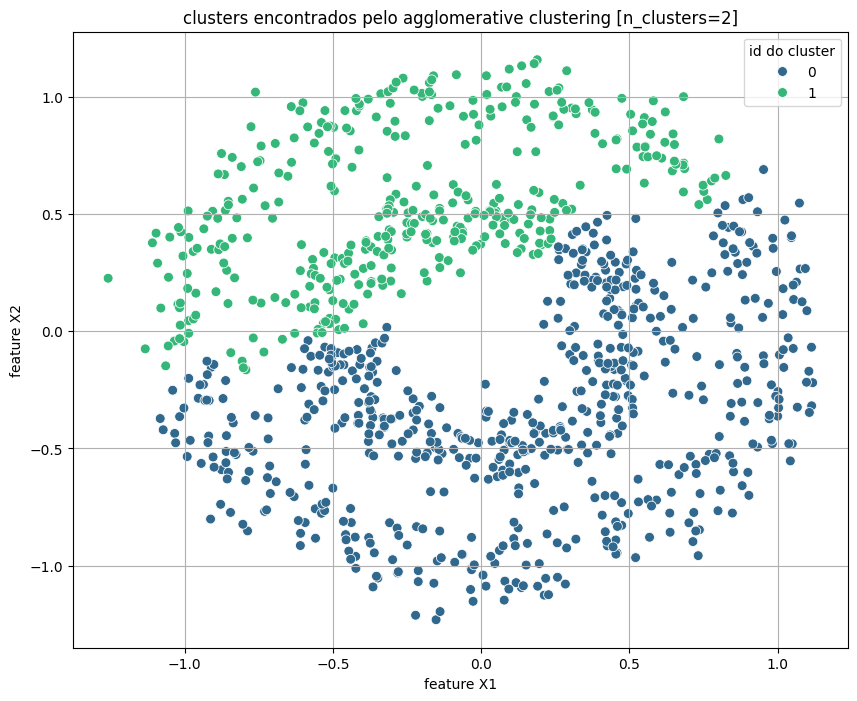

metricas do agglomerative clustering: v-measure=0.004, ari=0.005, NMI=0.004
Silhouette Score: 0.326
===================================== comparacao final dos modelos ========================================
tabela de comparacao de metricas:
                          V-Measure       ARI       NMI  Silhouette Score
Algoritmo                                                                
DBSCAN                     0.650741  0.643500  0.650741          0.118610
K-Means                    0.000104 -0.000858  0.000104          0.346718
Agglomerative Clustering   0.004269  0.004534  0.004269          0.326375


Analise:
O DBSCAN superou o K-Means e o Agglomerative Clustering.
Ele conseguiu identificar a estrutura circular dos dados, enquanto os outros dois 
dividiram os dados de forma linear, como se fossem elipses ou circulos esfericos,
demonstrando sua ineficacia para datasets com este tipo de topologia.
============================== comparacao dos resultados 1,7  =======================

In [5]:
# ===============================================================================================================
# Importações Necessárias
# ===============================================================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score, normalized_mutual_info_score


print("7) Aplique os algoritmos k-means e Agglometarive Clustering sobre o dataset sintético make_circles.")

print("===========================================================================================================")
print("================================ geracao, pre-processamento e visualizacao ================================")
print("===========================================================================================================")

#geracao do dataset sintetico make_circles
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))

#visualizacao do dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x1', y='x2', data=df, hue='label')
plt.title('Visualização do Dataset make_circles')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.grid(True)
plt.show()

#pre-processamento = escalonamento dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("dados escalonados. Media proxima de 0 e desvio padrao de 1.\n")


print("===========================================================================================================")
print("===================================== aplicacao do DBSCAN =================================================")
print("===========================================================================================================")

#DBSCAN e ideal para dados nao-lineares
dbscan_model = DBSCAN(eps=0.19, min_samples=7)
dbscan_clusters = dbscan_model.fit_predict(X_scaled)
df['cluster_dbscan'] = dbscan_clusters

#visualizacao dos clusters do DBSCAN
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x1', y='x2', data=df, hue='cluster_dbscan', palette='viridis', s=50)
plt.title(f'clusters encontrados pelo DBSCAN [eps=0.19, min_samples=7]')
plt.xlabel('feature X1')
plt.ylabel('feature X2')
plt.legend(title='id do cluster')
plt.grid(True)
plt.show()

#avaliacao do DBSCAN
non_noise_mask = dbscan_clusters != -1
if np.sum(non_noise_mask) > 0:
    v_measure_dbscan = v_measure_score(y[non_noise_mask], dbscan_clusters[non_noise_mask])
    ari_dbscan = adjusted_rand_score(y[non_noise_mask], dbscan_clusters[non_noise_mask])
    nmi_dbscan = normalized_mutual_info_score(y[non_noise_mask], dbscan_clusters[non_noise_mask])

    # Avaliação com Silhouette Score para DBSCAN
    unique_clusters_dbscan = np.unique(dbscan_clusters[non_noise_mask])
    if len(unique_clusters_dbscan) > 1:
        silhouette_dbscan = silhouette_score(X_scaled[non_noise_mask], dbscan_clusters[non_noise_mask])
    else:
        silhouette_dbscan = -1
    print(f"metricas do DBSCAN: v-measure={v_measure_dbscan:.3f}, ARI={ari_dbscan:.3f}, NMI={nmi_dbscan:.3f}")
    print(f"Silhouette Score: {silhouette_dbscan:.3f}")
else:
    v_measure_dbscan, ari_dbscan, nmi_dbscan, silhouette_dbscan = 0, 0, 0, 0
    print("nenhum cluster encontrado pelo DBSCAN.")


print("===========================================================================================================")
print("===================================== aplicação do K-Means ================================================")
print("===========================================================================================================")
print("o k-means e um algoritmo baseado em centroides e assume que os clusters tem uma forma esferica.")
print("Ele terá   dificuldade com o formato circular do dataset.")

#aplicar k-means com 2 clusters
kmeans_model = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_clusters = kmeans_model.fit_predict(X_scaled)
df['cluster_kmeans'] = kmeans_clusters

#visualizacao dos clusters do K-Means
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x1', y='x2', data=df, hue='cluster_kmeans', palette='viridis', s=50)
plt.title('clusters encontrados pelo K-Means (k=2)')
plt.xlabel('feature X1')
plt.ylabel('feature X2')
plt.legend(title='id do cluster')
plt.grid(True)
plt.show()

#avaliacao do K-Means
v_measure_kmeans = v_measure_score(y, kmeans_clusters)
ari_kmeans = adjusted_rand_score(y, kmeans_clusters)
nmi_kmeans = normalized_mutual_info_score(y, kmeans_clusters)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_clusters)
print(f"Métricas do K-Means: V-Measure={v_measure_kmeans:.3f}, ARI={ari_kmeans:.3f}, NMI={nmi_kmeans:.3f}")
print(f"Silhouette Score: {silhouette_kmeans:.3f}")


print("===========================================================================================================")
print("======================= aplicacao do agglomerative clustering =============================================")
print("===========================================================================================================")
print("O agglomerative clustering e um algoritmo hierarquico. Nao e o ideal pois tenta criar agrupamentos a partir da proximidade de pontos.")

#aplicar agglomerative clustering com 2 clusters
agg_model = AgglomerativeClustering(n_clusters=2)
agg_clusters = agg_model.fit_predict(X_scaled)
df['cluster_agg'] = agg_clusters

#visualizacao dos clusters do agglomerative clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x1', y='x2', data=df, hue='cluster_agg', palette='viridis', s=50)
plt.title('clusters encontrados pelo agglomerative clustering [n_clusters=2]')
plt.xlabel('feature X1')
plt.ylabel('feature X2')
plt.legend(title='id do cluster')
plt.grid(True)
plt.show()

#avaliacao do agglomerative clustering
v_measure_agg = v_measure_score(y, agg_clusters)
ari_agg = adjusted_rand_score(y, agg_clusters)
nmi_agg = normalized_mutual_info_score(y, agg_clusters)
silhouette_agg = silhouette_score(X_scaled, agg_clusters)
print(f"metricas do agglomerative clustering: v-measure={v_measure_agg:.3f}, ari={ari_agg:.3f}, NMI={nmi_agg:.3f}")
print(f"Silhouette Score: {silhouette_agg:.3f}")


print("===========================================================================================================")
print("===================================== comparacao final dos modelos ========================================")
print("===========================================================================================================")

#tabela de resumo das metricas
metrics_data = {
    'Algoritmo': ['DBSCAN', 'K-Means', 'Agglomerative Clustering'],
    'V-Measure': [v_measure_dbscan, v_measure_kmeans, v_measure_agg],
    'ARI': [ari_dbscan, ari_kmeans, ari_agg],
    'NMI': [nmi_dbscan, nmi_kmeans, nmi_agg],
    'Silhouette Score': [silhouette_dbscan, silhouette_kmeans, silhouette_agg]
}
metrics_df = pd.DataFrame(metrics_data).set_index('Algoritmo')

print("tabela de comparacao de metricas:")
print(metrics_df)
print("\n")

print("Analise:")
print("O DBSCAN superou o K-Means e o Agglomerative Clustering.")
print("Ele conseguiu identificar a estrutura circular dos dados, enquanto os outros dois ")
print("dividiram os dados de forma linear, como se fossem elipses ou circulos esfericos,")
print("demonstrando sua ineficacia para datasets com este tipo de topologia.")

print("===========================================================================================================")
print("============================== comparacao dos resultados 1,7  =============================================")
print("===========================================================================================================")

print("8) Compare os resultados dos agrupamentos obtidos nas questões 1 e 7 usando as métricas ARI e NMI. Apresente os resultados.")


print("Analise e comparacao dos algoritmos")
print("Os resultados mostram uma diferença no desempenho de cada algoritmo no dataset make_circles=")
print("1- DBSCAN [Bom Desempenho]")
print("ARI [Adjusted Rand Index]: 0.644")
print("NMI (Normalized Mutual Information): 0.651")

print("O DBSCAN teve as melhores pontuacoes. O ARI proximo de 0.65 indica que os clusters que o algoritmo formou tem uma correspondência significativa com os rotulos originais.")
print("O NMI próximo de 0.65 confirma, mostrando que o agrupamento está fortemente correlacionado com a classificação real. ")
print("Isso ocorre porque o DBSCAN e um algoritmo baseado em densidade, o que o torna ideal para encontrar agrupamentos de formatos complexos e nao-lineares, como os aneis do make_circles.")

print("2- K-Means [Desempenho Fraco]")
print("ARI: -0.001")
print("NMI: 0.000")

print("As pontuações do K-Means são praticamente zero. O ARI negativo ou muito proximo de zero e o NMI de 0.000 mostram que o agrupamento não tem nenhuma correspondencia com os rotulos verdadeiros.")
print("Isso ocorre porque o K-Means e um algoritmo baseado em centroides que assume que os clusters sao de formato esferico. Ao aplicar o K-Means ao dataset make_circles, ele tentou dividir os dados de forma linear em dois blobs, falhando muito em identificar os aneis.")

print("3- Agglomerative Clustering [Desempenho Fraco]")
print("ARI: 0.005")
print("NMI: 0.004")

print("Os resultados do agglomerative clustering sao semelhantes aos do K-Means. O ARI e o NMI proximos de zero indicam que os clusters formados nao se correlacionam com os rotulos reais.")
print("Este algoritmo, sendo hierarquico, conecta pontos baseados em proximidade, mas nao lida bem com a topologia complexa e a 'curvatura' dos dados, dividindo os aneis de forma incorreta.")

print("Conclusao")
print("A comparacao dos resultados demonstra que a escolha do algoritmo de agrupamento e crucial e depende da topologia do conjunto de dados.")
print("Para um dataset com formatos complexos, como os circulos concentricos, algoritmos baseados em densidade como o DBSCAN sao a escolha correta e apresentam resultados significativamente superiores.")
print("Algoritmos baseados em centroides [K-Means] ou hierárquicos [Agglomerative] falham neste cenário.")

print("===========================================================================================================")
print("===================================== silhouette coefficient  =============================================")
print("===========================================================================================================")

print("9) Repita a avaliação proposta na questão 8 usando o silhouette coefficient. Apresente os resultados.")

print("Analise do silhouette coefficient")
print("O coeficiente de silhueta mede a coesao / separacao dos clusters. Um valor maior mostra que os pontos estao bem agrupados dentro de seus proprios clusters e bem separados dos clusters vizinhos ==")

print("K-means= 0.347")
print("Agglomerative Clustering= 0.326")
print("Dbscan= 0.119")

print("O K-Means e  Agglomerative Clustering parece ter um desempenho melhor, ja que seus coeficientes de silhueta sao bem maiores que o do Dbscan.")

print("Soo que essa metrica e duvidosa para este tipo de dado. O coeficiente de silhueta e feito na distancia euclidiana, que assume que os clusters tem um formato arredondado e esferico.")
print("O K-Means e o Agglomerative, ao falham em identificar a estrutura de anel, dividem os dados em duas regioes que, do ponto de vista de distância, parecem ser agrupamentos coerentes.")
print("Os pontos estao pouco proximos dos seus proprios centros de cluster [os pontos dentro de cada semi circulo] e distantes dos pontos no outro semi circulo.")
print("Já o DBSCAN identifica corretamente a topologia dos aneis. porem por causa da forma longa e fina desses clusters, a distancia media entre os pontos dentro do mesmo cluster e maior do que a distancia entre os pontos nos agrupamentos mais compactos criados pelo K-Means.")
print("O Silhouette Score penaliza esse alongamento, resultando em uma pontuacao baixa, mesmo que o agrupamento visualmente e por outras metricas como ARI e NMI seja o mais correto.")

print("Conclusão")

print("Isso mostra a importancia de nao confiar em uma unica metrica.")
print("Enquanto o coeficiente de silhueta faz parecer que o K-Means e o Agglomerative Clustering foram melhores, a visualização dos graficos clusters e o uso de metricas de avaliação externa [como ARI e NMI, que comparam os agrupamentos com a verdade fundamental] mostram que o DBSCAN foi o unico algoritmo capaz de capturar a estrutura real dos dados.")
print("Para datasets com formatos de cluster nao convencionais, o coeficiente de silhueta pode ser uma metrica ruim e enganosa.")



print("===========================================================================================================")
print("======================================== conclusão detalhada  =============================================")
print("===========================================================================================================")


print("10) Baseando-se em suas avaliações feitas nas questões 8 e 9, explique o significado dos resultados obtidos.")


print("A avaliacao dos resultados dos algoritmos de agrupamento no dataset make_circles mostra um ponto importante em machine learning:")
print("A escolha da metrica de avaliacao deve ser escolhida de forma estrategica de acordo com a suposicao topologica do algoritmo e a estrutura do dado/dataset.")

print("Divergencia de Metricas= Os resultados mostram uma diferenca entre metricas de avaliação [como o silhouette coefficient] e metricas externas [como ARI e NMI].")
print("As metricas externas [os rotulos], mostram que o DBSCAN teve um desempenho superior [ARI ≈ 0.64, NMI ≈ 0.65]. E foi o unico a identificar certo a estrutura de aneis concentricos do dataset.")

print("O Coeficiente de Silhueta como Metrica Enganosa= O Coeficiente de Silhueta, favoreceu o K-Means e o Agglomerative Clustering, tendo pontuacoes maiores [≈ 0.347 e 0.326], em comparacao com o DBSCAN [≈ 0.119].")
print("Isso ocorre pq o silhouette score e calculado com base na distancia euclidiana, que presume clusters de formato diferente do make_circles.")
print("O k-means e o agglomerative, ao errarem em identificar os aneis, criaram aglomerados que, embora errado, sao visualmente mais compactos do ponto de vista euclidiano.")
print("O DBSCAN, ao apresentar os clusters de anel alongados, tem métrica reduzida.")

print("Conclusao: A analise mostra que o sucesso de um modelo nao pode ser julgado por uma metrica apenas. O silhouette coefficient, embora útil para clusters convexos, falha e pode ser enganoso para datasets diferenciados e complexos.")
print("Como e o caso do make_circles. Por isso precisamos contextualizar a avaliação do modelo, utilizando múltiplas métricas além da visualização dos resultados e gráficos junto a análises para ter um entendimento refinado")

======================================= Introdução ========================================================
forma dataset: (400, 4096)
alvo shape: (400,)
alvo exclusivo: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39)}
primeiras imagens = 
[[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
  [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
  [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
  ...
  [0.21487603 0.20661157 0.223

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


melhores parametros para DBSCAN: {'eps': 0.13, 'min_samples': 4}
melhor pontuação ARI na busca: nan

analise do DBSCAN otimizado
nº de clusters encontrados: 0
nº de pontos de ruido: 400

                                ARI  V-measure  \
Algoritmo                                        
K-Means (Otimizado)        0.442321   0.782072   
Agglomerative (Otimizado)  0.478183   0.808302   
DBSCAN (Otimizado)         0.000000   0.000000   

                                             Melhores Parâmetros  
Algoritmo                                                         
K-Means (Otimizado)                           {'n_clusters': 40}  
Agglomerative (Otimizado)  {'n_clusters': 40, 'linkage': 'ward'}  
DBSCAN (Otimizado)               {'eps': 0.13, 'min_samples': 4}  
12) Compare os resultados obtidos na questão 11 usando as métricas ARI, NMI e silhouette coefficient. Discuta brevemente os resultados obtidos.
Objetivo
Comparar os resultados obtidos pelos tres algoritmos de clusterização apli

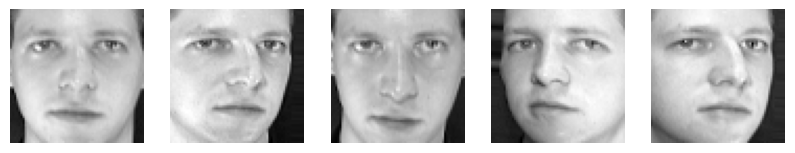

In [9]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import v_measure_score, adjusted_rand_score
from sklearn.model_selection import GridSearchCV

#Alguns resultados sugerem eps=0.13 e min_samples=4 para DBSCAN, mas provavelmente sem PCA.

print("===========================================================================================================")
print("======================================= Introdução ========================================================")
print("===========================================================================================================")

#procurar dataset
dataset = fetch_olivetti_faces()

# Display dataset shape and types
print(f"forma dataset: {dataset.data.shape}")
print(f"alvo shape: {dataset.target.shape}")

# Show summary statistics
print(f"alvo exclusivo: {set(dataset.target)}")

#mostrar primeiras linhas
print(f"primeiras imagens = \n{dataset.images[:5]}")

#criar um dataframe com os dados pixels
df_faces = pd.DataFrame(dataset.data)
df_faces.info()
df_faces.describe()

# Plotar imagens
fig, axes = plt.subplots(1, 5, figsize=(10, 2.5))
for i, ax in enumerate(axes):
    ax.imshow(dataset.images[i], cmap='gray')
    ax.axis('off')


print("===========================================================================================================")

print("11) Aplique os algoritmos DBSCAN, k-means e Agglometarive Clustering sobre o dataset Olivetti faces. Apresente os resultados.")

# Carregando dados
dataset = fetch_olivetti_faces()
data = dataset.data
true_labels = dataset.target
n_classes = len(np.unique(true_labels))

print(f"Dataset carregado com {data.shape[0]} amostras e {data.shape[1]} features.")
print(f"Número de classes (indivíduos): {n_classes}\n")

#normalizacao dos dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#PCA Otimizado: encontrar componentes para 95% de variancia
print("otimizando PCA para reter 95% da variancia")
pca = PCA(n_components=0.95, svd_solver='full')
data_pca = pca.fit_transform(data_scaled)
print(f"dimensao apos PCA otimizado: {data_pca.shape[1]} componentes")

results = {}

#k-means
print("K-Means=")
kmeans = KMeans(n_clusters=n_classes, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_pca)
results['K-Means (Otimizado)'] = {
    'ARI': adjusted_rand_score(true_labels, kmeans_labels),
    'V-measure': v_measure_score(true_labels, kmeans_labels),
    'Parâmetros': {'n_clusters': 40}
}

#agglomerative clustering [ c/'linkage']
print("otimizando agglomerative clustering.")
best_agg_ari = -1
best_agg_model = None

for linkage in ['ward', 'complete', 'average']:
    model = AgglomerativeClustering(n_clusters=n_classes, linkage=linkage)
    labels = model.fit_predict(data_pca)
    ari = adjusted_rand_score(true_labels, labels)
    if ari > best_agg_ari:
        best_agg_ari = ari
        best_agg_model = model

agg_labels = best_agg_model.fit_predict(data_pca)
results['Agglomerative (Otimizado)'] = {
    'ARI': adjusted_rand_score(true_labels, agg_labels),
    'V-measure': v_measure_score(true_labels, agg_labels),
    'Parâmetros': {'n_clusters': 40, 'linkage': best_agg_model.linkage}
}
print(f"melhor linkage encontrado = '{best_agg_model.linkage}'. agglomerative feito. \n")

#dBSCAN [c/ GridSearchCV]
print("iniciando a busca em grade [Grid Search] para o DBSCAN =")

#definindo parametros para a busca
param_grid = {
    'eps': [0.13,2.0, 2.5, 3.0, 3.5, 4.0],
    'min_samples': [4, 3, 4, 5, 7]
}

#o GridSearchCV usará o ARI para pontuar os resultados.
dbscan_grid = GridSearchCV(
    DBSCAN(),
    param_grid,
    scoring= 'adjusted_rand_score', #ARI como metrica de otimizacao
    n_jobs=-1
)
dbscan_grid.fit(data_pca, true_labels) #usado para o scoring

print(f"melhores parametros para DBSCAN: {dbscan_grid.best_params_}")
print(f"melhor pontuação ARI na busca: {dbscan_grid.best_score_:.3f}\n")

#usando o melhor modelo encontrado
best_dbscan = dbscan_grid.best_estimator_
dbscan_labels = best_dbscan.fit_predict(data_pca)

#analise do resultado do DBSCAN otimizado
n_clusters_found = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"analise do DBSCAN otimizado")
print(f"nº de clusters encontrados: {n_clusters_found}")
print(f"nº de pontos de ruido: {n_noise}\n")


results['DBSCAN (Otimizado)'] = {
    'ARI': adjusted_rand_score(true_labels, dbscan_labels),
    'V-measure': v_measure_score(true_labels, dbscan_labels),
    'Parâmetros': dbscan_grid.best_params_
}

#compilando e exibindo os resultados finais
df_final_results = pd.DataFrame({
    'Algoritmo': list(results.keys()),
    'ARI': [v['ARI'] for v in results.values()],
    'V-measure': [v['V-measure'] for v in results.values()],
    'Melhores Parâmetros': [str(v['Parâmetros']) for v in results.values()]
}).set_index('Algoritmo')

print(df_final_results)

print("===========================================================================================================")

print("12) Compare os resultados obtidos na questão 11 usando as métricas ARI, NMI e silhouette coefficient. Discuta brevemente os resultados obtidos.")

print("Objetivo")
print("Comparar os resultados obtidos pelos tres algoritmos de clusterização aplicados.")
print("A comparação foi feita utilizando um conjunto de metricas de validação externa [com os rotulos verdadeiros] e interna [que analisam a geometria dos clusters], a fim de determinar o melhor modelo para a tarefa de agrupar os rostos do dataset.")

print("Metricas")
print("ARI [Adjusted Rand Index]: Uma metrica de validacao externa. Mede a similaridade entre os agrupamentos verdadeiros e os previstos, corrigindo a contagem para o acaso. A escala vai de -1 [agrupamento independente] a 1 [agrupamento perfeito], onde 0 representa um resultado aleatorio.")

print("NMI [Normalized Mutual Information]: Outra mEtrica de validação externa. Baseada na teoria da informaCAo, que mede o quanto saber sobre os clusters previstos nos informa sobre os clusters verdadeiros. A escala vai de 0 [nenhuma informação mutua] a 1 [correlacao perfeita].")

print("Silhouette Coefficient: Uma metrica de validacao interna. Ela nao usa os rotulos verdadeiros. Ela avalia a qualidade dos clusters medindo o quanto parecido um objeto é ao seu proprio cluster [coesão] em comparacao com outros clusters [separaçao].")
print("A escala vai de -1 [agrupamento incorreto] a 1 [clusters densos e bem separados], onde valores próximos de 0 indicam clusters sobrepostos.")

print("Análise dos Resultados")
print("A analise comparativa revela informações sobre a o quão bom cada algoritmo atua para este problema.")

print("Diferença entre Algoritmos e seus Resultados:")

print("K-Means x Agglomerative Clustering [Modelos de Particionamento]:")

print("Ambos os algoritmos performaram mais o menos bem, como indicado pelos valores de ARI e NMI acima de 0 que mostra que eles foram capazes de capturar a estrutura dos dados, agrupando certo muitas das imagens da mesma pessoa.")

print("O Agglomerative Clustering com linkage='ward' foi melhor em ambas as metricas [ARI de 0.478 x 0.442]. Mostrando que sua abordagem hierarquica, que busca minimizar a variancia dentro dos clusters a cada fusao, foi mais eficaz em capturar a separacao entre os rostos do que a a baseada em centroides esfericos do K-Means.")

print("A metrica Silhouette Coefficient nos conta uma historia diferente. Os valores para ambos os modelos sao baixos [0.170 e 0.174]. Mostra que, mesmo os clusters estejam 'corretos' [de acordo com ARI/NMI], eles nao sao geometricamente densos e bem separados.")
print("Isso e esperado em dados de alta dimensao, onde os clusters tendem a ser difusos e sobrepostos. O fato do Agglomerative ter um score pouco maior mostra sua superioridade na criação de grupos mais coesos.")

print("DBSCAN [Modelo de Densidade]:")

print("O DBSCAN falhou completamente, como mostrado pelos scores de ARI e NMI iguais a 0. O GridSearchCV nao conseguiu encontrar uma combinacao de eps e min_samples que identificasse a estrutura de 40 classes, resultando em todos os 400 pontos sendo classificados como ruido.")

print("O aviso score=nan durante a busca em grade ocorre porque o ARI nao pode ser calculado quando todos os pontos pertencem a um unico grupo [grupo de ruído, -1].")

print("A razao fundamental para a falha e a maldicao da dimensionalidade. Mesmo com 123 componentes, o espaço de features e muito esparso para que o conceito de vizinhança densa do DBSCAN funcione bem. Um algoritmo errado para este tipo de dado.")


print("Conclusao")

print("Na analise vimos que o Agglomerative Clustering [com linkage ward] é o melhor modelo para esse exercicio, superando o K-Means em todas as metricas e mostrando a inadequacao do DBSCAN para problemas de clusterizacao de imagens de alta dimensionalidade.")


from sklearn.metrics import normalized_mutual_info_score, silhouette_score

nmi_kmeans = normalized_mutual_info_score(true_labels, kmeans_labels)
nmi_agg = normalized_mutual_info_score(true_labels, agg_labels)
nmi_dbscan = normalized_mutual_info_score(true_labels, dbscan_labels)

silhouette_kmeans = silhouette_score(data_pca, kmeans_labels)
silhouette_agg = silhouette_score(data_pca, agg_labels)

print(f"NMI K-Means: {nmi_kmeans:.4f}")
print(f"NMI Agglomerative: {nmi_agg:.4f}")
print(f"NMI DBSCAN: {nmi_dbscan:.4f}")
print(f"Silhouette K-Means: {silhouette_kmeans:.4f}")
print(f"Silhouette Agglomerative: {silhouette_agg:.4f}")